In [2]:
# Deutsch-Jozsaアルゴリズム用のサンプルコード
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

In [7]:
# f (x)への入力変数
n = 3

# オラクル(f (x))の選択
# b ： バランス関数 c : 定数関数
oracle = "c"

# 定数関数の場合、出力0 or 1を選択する
if oracle == "c" :
    c = np.random.randint(2)


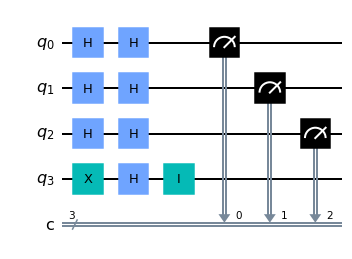

In [8]:
# 量子回路を生成する
qc = QuantumCircuit(n+1, n)
# NOTゲート(最下層ビット反転)
qc.x(n)
# 全量子ビットにアダマールゲートを適用させる。
for i in range(n + 1) :
    qc.h(i)

# オラクルに応じたゲートを作用させる。
if oracle == "c" :
    if c == 1 :
        qc.x(n)
    else :
        qc.id(n)
else :
    for j in range(n) :
        # CNOTゲートを適用させる
        qc.cx(j, n)

# 上位nビットに対してアダマールゲートを適用させる。
for k in range(n) :
    qc.h(k)

# 測定する。
for l in range(n) :
    qc.measure(l, l)
    
qc.draw('mpl')

In [9]:
# マシンを選択して実行する。
backend = Aer.get_backend('qasm_simulator')
# ジョブを実行する
job = execute(qc, backend=backend, shots=1024)
cal_results=job.result()

{'000': 1024}


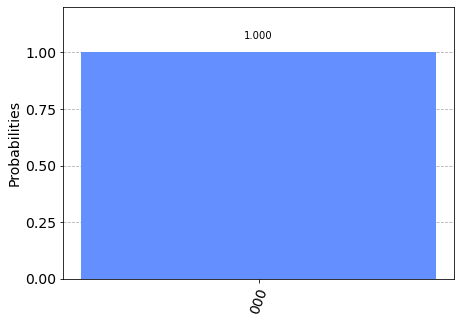

In [10]:
# 結果を取得して描画&プロットする。
answer = cal_results.get_counts()
print(answer)
plot_histogram(answer)